In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%pip install tqdm

from tqdm import tqdm
tqdm.pandas()  # Integrasi tqdm dengan pandas

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
#menggunakana file
url = 'hasil_reviews_pln_mobile.csv'
reviews = pd.read_csv(url)

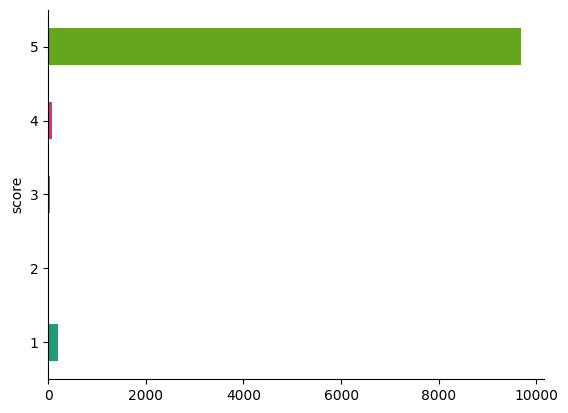

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
reviews.groupby('score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Menampilkan jumlah data reviews yang berhasil di ambil
len(reviews)

10000

In [ ]:
# Memilih kolom 'content' dan 'score' dari DataFrame reviews
reviews = reviews[['content', 'score']]

# Menghapus baris yang memiliki nilai null
reviews = reviews.dropna()

# Menghapus semua karakter non-alfanumerik (kecuali spasi) dari kolom 'content'
reviews['clean_content'] = reviews['content'].str.replace('[^\w\s]', '')

# Mengubah semua teks dalam kolom 'clean_content' menjadi huruf kecil
reviews['clean_content'] = reviews['clean_content'].str.lower()

# Menampilkan kolom 'content', 'clean_content', dan 'score' dari DataFrame reviews
reviews[['content', 'clean_content', 'score']]

<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3294228532.py:8: SyntaxWarning: invalid escape sequence '\w'
  reviews['clean_content'] = reviews['content'].str.replace('[^\w\s]', '')


content  \
0                                 respon pengaduan lama   
1              itu yang ulasan bintang 5, bayaran semua   
2     PLN mobile adalah solusi canggih untuk kebutuh...   
3                                               PLN Ok,   
4                                                    ok   
...                                                 ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...   
9996  Alhamdulillah sudah nyala sangat membantu teri...   
9997                 sangat membantu 🫶🙏 pelayanan cepat   
9998                         Terimakasih sudah nyala lg   
9999           tlfn pln malah disuruh cari teknisi lain   

                                          clean_content  score  
0                                 respon pengaduan lama      1  
1              itu yang ulasan bintang 5, bayaran semua      1  
2     pln mobile adalah solusi canggih untuk kebutuh...      5  
3                                               pln ok,      5  
4                                                    ok      5  
...                                                 ...    ...  
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...      1  
9996  alhamdulillah sudah nyala sangat membantu teri...      5  
9997                 sangat membantu 🫶🙏 pelayanan cepat      5  
9998                         terimakasih sudah nyala lg      5  
9999           tlfn pln malah disuruh cari teknisi lain      1  

[10000 rows x 3 columns]

In [ ]:
# Mendownload lexicon 'vader' yang digunakan untuk analisis sentimen
nltk.download('vader_lexicon')

# Membuat objek SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Menghitung skor sentimen untuk setiap review dalam 'clean_content'
# Skor sentimen dihitung menggunakan metode polarity_scores dari SentimentIntensityAnalyzer
# Skor sentimen kemudian disimpan dalam kolom baru 'sentiment'
reviews['sentiment'] = reviews['clean_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Mengubah skor sentimen menjadi label sentimen
# Jika skor > 0, labelnya adalah 'positif'
# Jika skor < 0, labelnya adalah 'negatif'
# Jika skor = 0, labelnya adalah 'netral'
reviews['sentiment'] = reviews['sentiment'].apply(lambda x: 'positif' if x > 0 else ('negatif' if x < 0 else 'netral'))

# Menampilkan kolom 'content' (isi review asli) dan 'sentiment' (label sentimen) dari DataFrame reviews
reviews[['content', 'sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


content sentiment
0                                 respon pengaduan lama    netral
1              itu yang ulasan bintang 5, bayaran semua    netral
2     PLN mobile adalah solusi canggih untuk kebutuh...    netral
3                                               PLN Ok,   positif
4                                                    ok   positif
...                                                 ...       ...
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...    netral
9996  Alhamdulillah sudah nyala sangat membantu teri...    netral
9997                 sangat membantu 🫶🙏 pelayanan cepat    netral
9998                         Terimakasih sudah nyala lg    netral
9999           tlfn pln malah disuruh cari teknisi lain    netral

[10000 rows x 2 columns]

In [ ]:
reviews['score'].value_counts()

score
5    9674
1     192
4      81
3      28
2      25
Name: count, dtype: int64

<Axes: xlabel='score'>

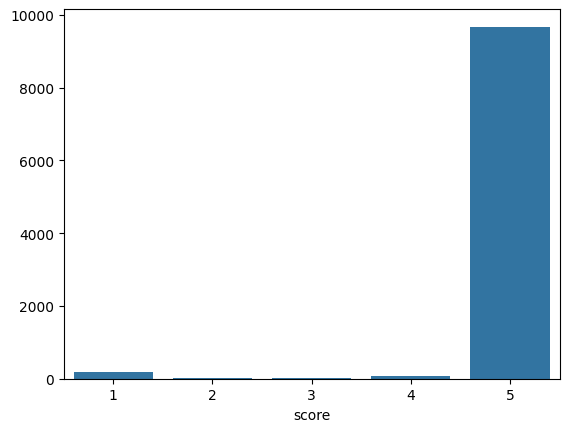

In [ ]:
import seaborn as sns
result = reviews.groupby(['score']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

In [ ]:
# Inisialisasi daftar sentimen
label_num = []

# Iterasi setiap baris dalam DataFrame
for index, row in reviews.iterrows():
    if row['score'] > 3 :
        label_num.append(1)     # nilai 1 untuk score 4 - 5
    elif row['score'] == 3:
        label_num.append(0)     # nilai 0 untuk score 3
    else:
        label_num.append(-1)    # nilai -1 untuk score 1 - 2

# Tambahkan kolom baru
reviews['label_num'] = label_num
reviews


content  score  \
0                                 respon pengaduan lama      1   
1              itu yang ulasan bintang 5, bayaran semua      1   
2     PLN mobile adalah solusi canggih untuk kebutuh...      5   
3                                               PLN Ok,      5   
4                                                    ok      5   
...                                                 ...    ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...      1   
9996  Alhamdulillah sudah nyala sangat membantu teri...      5   
9997                 sangat membantu 🫶🙏 pelayanan cepat      5   
9998                         Terimakasih sudah nyala lg      5   
9999           tlfn pln malah disuruh cari teknisi lain      1   

                                          clean_content sentiment  label_num  
0                                 respon pengaduan lama    netral         -1  
1              itu yang ulasan bintang 5, bayaran semua    netral         -1  
2     pln mobile adalah solusi canggih untuk kebutuh...    netral          1  
3                                               pln ok,   positif          1  
4                                                    ok   positif          1  
...                                                 ...       ...        ...  
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...    netral         -1  
9996  alhamdulillah sudah nyala sangat membantu teri...    netral          1  
9997                 sangat membantu 🫶🙏 pelayanan cepat    netral          1  
9998                         terimakasih sudah nyala lg    netral          1  
9999           tlfn pln malah disuruh cari teknisi lain    netral         -1  

[10000 rows x 5 columns]

In [ ]:
# Inisialisasi daftar label
label = []

# Iterasi setiap baris dalam DataFrame
for index, row in reviews.iterrows():
    if row['score'] > 3 :
        label.append("positive")     # nilai 1 untuk score 4 - 5
    elif row['score'] == 3:
        label.append("neutral")     # nilai 0 untuk score 3
    else:
        label.append("negative")    # nilai -1 untuk score 1 - 2

# Tambahkan kolom baru
reviews['label'] = label
reviews


content  score  \
0                                 respon pengaduan lama      1   
1              itu yang ulasan bintang 5, bayaran semua      1   
2     PLN mobile adalah solusi canggih untuk kebutuh...      5   
3                                               PLN Ok,      5   
4                                                    ok      5   
...                                                 ...    ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...      1   
9996  Alhamdulillah sudah nyala sangat membantu teri...      5   
9997                 sangat membantu 🫶🙏 pelayanan cepat      5   
9998                         Terimakasih sudah nyala lg      5   
9999           tlfn pln malah disuruh cari teknisi lain      1   

                                          clean_content sentiment  label_num  \
0                                 respon pengaduan lama    netral         -1   
1              itu yang ulasan bintang 5, bayaran semua    netral         -1   
2     pln mobile adalah solusi canggih untuk kebutuh...    netral          1   
3                                               pln ok,   positif          1   
4                                                    ok   positif          1   
...                                                 ...       ...        ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...    netral         -1   
9996  alhamdulillah sudah nyala sangat membantu teri...    netral          1   
9997                 sangat membantu 🫶🙏 pelayanan cepat    netral          1   
9998                         terimakasih sudah nyala lg    netral          1   
9999           tlfn pln malah disuruh cari teknisi lain    netral         -1   

         label  
0     negative  
1     negative  
2     positive  
3     positive  
4     positive  
...        ...  
9995  negative  
9996  positive  
9997  positive  
9998  positive  
9999  negative  

[10000 rows x 6 columns]

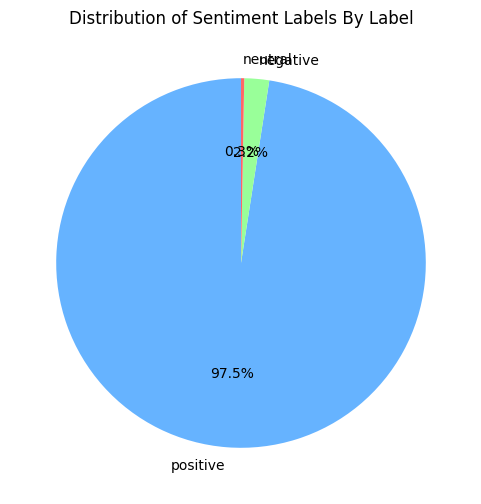

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah label pada setiap kategori
label_counts = reviews['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Distribution of Sentiment Labels By Label')
plt.show()

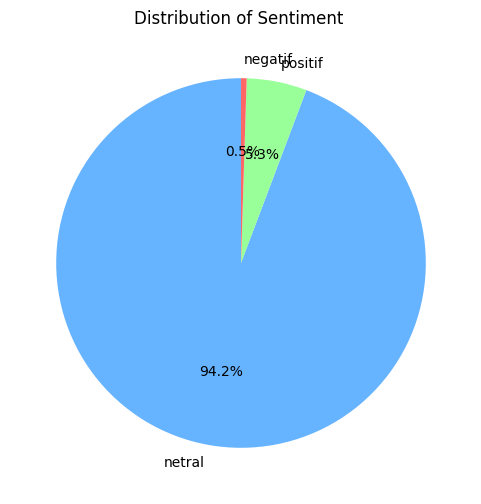

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah label pada setiap kategori
label_counts = reviews['sentiment'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Distribution of Sentiment ')
plt.show()

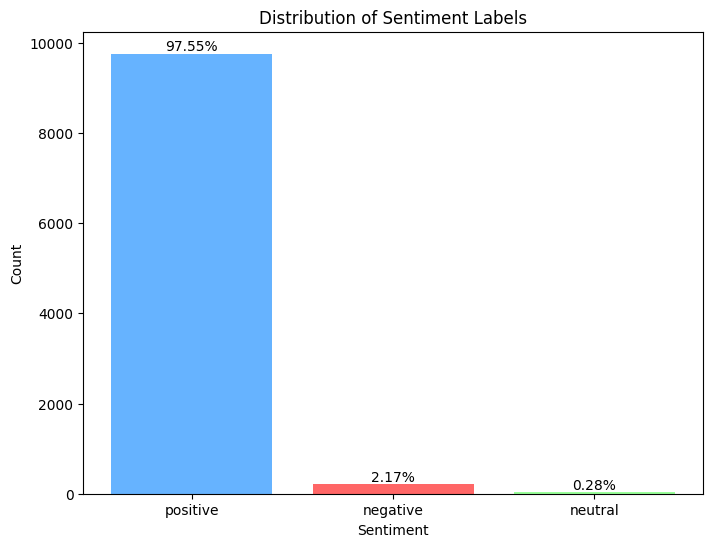

In [ ]:
# Hitung jumlah label pada setiap kategori
label_counts = reviews['label'].value_counts()

# Hitung persentase untuk setiap kategori
label_percentages = label_counts / label_counts.sum() * 100

# Buat bar chart dan simpan dalam variabel `bars`
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['#66b3ff', '#ff6666', '#99ff99'])

# Tambahkan persentase di atas setiap bar
for bar, percentage in zip(bars, label_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

PRreprocess_text


In [ ]:
# Menghapus URL dari konten review
reviews['content'] = reviews['content'].str.replace('https\S+', ' ', case=False)

# Menghapus mention (@) dari konten review
reviews['content'] = reviews['content'].str.replace('@\S+', ' ', case=False)

# Menghapus hashtag (#) dari konten review
reviews['content'] = reviews['content'].str.replace('#\S+', ' ', case=False)

# Menghapus kontraksi kata (misalnya, "don't" menjadi "do not")
reviews['content'] = reviews['content'].str.replace("\'\w+", ' ', case=False)

# Menghapus tanda baca dari konten review
reviews['content'] = reviews['content'].str.replace("[^\w\s]", ' ', case=False)

# Menghapus angka yang merupakan '2' dalam teks (mungkin typo)
reviews['content'] = reviews['content'].str.replace("\s(2)", ' ', case=False)


# Mengimpor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize

# Mengimpor RegexpTokenizer dari nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Membuat instance RegexpTokenizer untuk hanya mempertahankan kata (alphanumeric)
regexp = RegexpTokenizer('\w+')

# Menerapkan tokenisasi pada kolom 'content'
reviews['content_token'] = reviews['content'].apply(regexp.tokenize)

# Menampilkan 3 baris pertama dari dataframe
reviews

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-40985454.py:2: SyntaxWarning: invalid escape sequence '\S'
  reviews['content'] = reviews['content'].str.replace('https\S+', ' ', case=False)
/tmp/ipython-input-40985454.py:5: SyntaxWarning: invalid escape sequence '\S'
  reviews['content'] = reviews['content'].str.replace

content  score  \
0                                 respon pengaduan lama      1   
1              itu yang ulasan bintang 5, bayaran semua      1   
2     PLN mobile adalah solusi canggih untuk kebutuh...      5   
3                                               PLN Ok,      5   
4                                                    ok      5   
...                                                 ...    ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...      1   
9996  Alhamdulillah sudah nyala sangat membantu teri...      5   
9997                 sangat membantu 🫶🙏 pelayanan cepat      5   
9998                         Terimakasih sudah nyala lg      5   
9999           tlfn pln malah disuruh cari teknisi lain      1   

                                          clean_content sentiment  label_num  \
0                                 respon pengaduan lama    netral         -1   
1              itu yang ulasan bintang 5, bayaran semua    netral         -1   
2     pln mobile adalah solusi canggih untuk kebutuh...    netral          1   
3                                               pln ok,   positif          1   
4                                                    ok   positif          1   
...                                                 ...       ...        ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...    netral         -1   
9996  alhamdulillah sudah nyala sangat membantu teri...    netral          1   
9997                 sangat membantu 🫶🙏 pelayanan cepat    netral          1   
9998                         terimakasih sudah nyala lg    netral          1   
9999           tlfn pln malah disuruh cari teknisi lain    netral         -1   

         label                                      content_token  
0     negative                          [respon, pengaduan, lama]  
1     negative    [itu, yang, ulasan, bintang, 5, bayaran, semua]  
2     positive  [PLN, mobile, adalah, solusi, canggih, untuk, ...  
3     positive                                          [PLN, Ok]  
4     positive                                               [ok]  
...        ...                                                ...  
9995  negative  [aplikasihnya, tdk, bisa, d, gunakan, untuk, d...  
9996  positive  [Alhamdulillah, sudah, nyala, sangat, membantu...  
9997  positive               [sangat, membantu, pelayanan, cepat]  
9998  positive                    [Terimakasih, sudah, nyala, lg]  
9999  negative   [tlfn, pln, malah, disuruh, cari, teknisi, lain]  

[10000 rows x 7 columns]

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
# Make a list of Indonesian stopwords: menghapus kata yang sering muncul
stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend the list with your own custom stopwords
my_stopwords = ['PLN Mobile']
stopwords.extend(my_stopwords)
# Remove stopwords
reviews['content_token'] = reviews['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
reviews.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


content  score  \
0                              respon pengaduan lama      1   
1           itu yang ulasan bintang 5, bayaran semua      1   
2  PLN mobile adalah solusi canggih untuk kebutuh...      5   
3                                            PLN Ok,      5   
4                                                 ok      5   

                                       clean_content sentiment  label_num  \
0                              respon pengaduan lama    netral         -1   
1           itu yang ulasan bintang 5, bayaran semua    netral         -1   
2  pln mobile adalah solusi canggih untuk kebutuh...    netral          1   
3                                            pln ok,   positif          1   
4                                                 ok   positif          1   

      label                                      content_token  
0  negative                                [respon, pengaduan]  
1  negative                      [ulasan, bintang, 5, bayaran]  
2  positive  [PLN, mobile, solusi, canggih, kebutuhan, keli...  
3  positive                                          [PLN, Ok]  
4  positive                                               [ok]

In [ ]:
!pip install Sastrawi
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer: mengubah ke kata dasar
factory = StemmerFactory()
stemmer = factory.create_stemmer()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.3 MB/s eta 0:00:00


In [ ]:
#reviews['stemmed'] = reviews['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
reviews['stemmed'] = reviews['content_token'].progress_apply(lambda x: [stemmer.stem(y) for y in x])
reviews.head(5)

100%|██████████| 10000/10000 [08:56<00:00, 18.63it/s]


content  score  \
0                              respon pengaduan lama      1   
1           itu yang ulasan bintang 5, bayaran semua      1   
2  PLN mobile adalah solusi canggih untuk kebutuh...      5   
3                                            PLN Ok,      5   
4                                                 ok      5   

                                       clean_content sentiment  label_num  \
0                              respon pengaduan lama    netral         -1   
1           itu yang ulasan bintang 5, bayaran semua    netral         -1   
2  pln mobile adalah solusi canggih untuk kebutuh...    netral          1   
3                                            pln ok,   positif          1   
4                                                 ok   positif          1   

      label                                      content_token  \
0  negative                                [respon, pengaduan]   
1  negative                      [ulasan, bintang, 5, bayaran]   
2  positive  [PLN, mobile, solusi, canggih, kebutuhan, keli...   
3  positive                                          [PLN, Ok]   
4  positive                                               [ok]   

                                             stemmed  
0                                      [respon, adu]  
1                          [ulas, bintang, 5, bayar]  
2  [pln, mobile, solusi, canggih, butuh, listrik,...  
3                                          [pln, ok]  
4                                               [ok]

In [ ]:
reviews['text_string'] = reviews['stemmed'].progress_apply(lambda x: ' '.join([item for item in x if len(item)>3]))
reviews.head(5)

100%|██████████| 10000/10000 [00:00<00:00, 487868.61it/s]


content  score  \
0                              respon pengaduan lama      1   
1           itu yang ulasan bintang 5, bayaran semua      1   
2  PLN mobile adalah solusi canggih untuk kebutuh...      5   
3                                            PLN Ok,      5   
4                                                 ok      5   

                                       clean_content sentiment  label_num  \
0                              respon pengaduan lama    netral         -1   
1           itu yang ulasan bintang 5, bayaran semua    netral         -1   
2  pln mobile adalah solusi canggih untuk kebutuh...    netral          1   
3                                            pln ok,   positif          1   
4                                                 ok   positif          1   

      label                                      content_token  \
0  negative                                [respon, pengaduan]   
1  negative                      [ulasan, bintang, 5, bayaran]   
2  positive  [PLN, mobile, solusi, canggih, kebutuhan, keli...   
3  positive                                          [PLN, Ok]   
4  positive                                               [ok]   

                                             stemmed  \
0                                      [respon, adu]   
1                          [ulas, bintang, 5, bayar]   
2  [pln, mobile, solusi, canggih, butuh, listrik,...   
3                                          [pln, ok]   
4                                               [ok]   

                                         text_string  
0                                             respon  
1                                 ulas bintang bayar  
2  mobile solusi canggih butuh listrik tagih lapo...  
3                                                     
4

In [ ]:
reviews['text_string'] = reviews['text_string'].astype('str')
reviews['text_string'] = reviews['text_string'].astype(pd.StringDtype())
reviews.dtypes

content                  object
score                     int64
clean_content            object
sentiment                object
label_num                 int64
label                    object
content_token            object
stemmed                  object
text_string      string[python]
dtype: object

In [ ]:
reviews.to_csv('hasil_Preprocessing_pln_mobile.csv',index= False) #simpan hasil text preprocessing ke file csv
df=reviews

# Modelling Import Libraries

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer

from tqdm import tqdm

from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
X = df['text_string']
y = df['label_num']

In [ ]:
X

0                                                  respon
1                                      ulas bintang bayar
2       mobile solusi canggih butuh listrik tagih lapo...
3                                                        
4                                                        
                              ...                        
9995                           aplikasihnya daftar pasang
9996    alhamdulillah nyala bantu terimakasih tugas mo...
9997                                    bantu layan cepat
9998                                    terimakasih nyala
9999                              tlfn suruh cari teknisi
Name: text_string, Length: 10000, dtype: string

In [ ]:
y

0      -1
1      -1
2       1
3       1
4       1
       ..
9995   -1
9996    1
9997    1
9998    1
9999   -1
Name: label_num, Length: 10000, dtype: int64

# BiLSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Fill NaN values with an empty string
df['text_string'] = df['text_string'].fillna('')

# Inisialisasi Tokenizer
tokenizer = Tokenizer()

# Tokenisasi teks
tokenizer.fit_on_texts(df['text_string'])

# Mengubah teks menjadi sequence
X_seq = tokenizer.texts_to_sequences(df['text_string'])

# Padding sequence
X_pad = pad_sequences(X_seq, maxlen=50)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=40)

# Inisialisasi model
model_bilstm = Sequential()



# Menambahkan layer Embedding
model_bilstm.add(Embedding(len(tokenizer.word_index)+1, 256))

# Menambahkan layer Bidirectional LSTM
model_bilstm.add(Bidirectional(LSTM(128, return_sequences=True)))
model_bilstm.add(Dropout(0.5))

model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.5))


# Menambahkan layer Dense
model_bilstm.add(Dense(1, activation='sigmoid'))

# Compile model
model_bilstm.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Implementasi Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Latih model
history = model_bilstm.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stopping])

# Simpan model
model_bilstm.save('model_bilstmPLN.h5')

# Evaluasi model
loss, accuracy_bilstm = model_bilstm.evaluate(X_test, y_test)
print('Loss:', loss)
# ubah accuracy menjadi persen
accuracy_bilstm = accuracy_bilstm * 100
print('Accuracy:', accuracy_bilstm)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 911ms/step - accuracy: 0.9238 - loss: 0.5450 - val_accuracy: 0.9765 - val_loss: 0.2752
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 878ms/step - accuracy: 0.9772 - loss: 0.2481 - val_accuracy: 0.9765 - val_loss: 0.1963
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 876ms/step - accuracy: 0.9734 - loss: 0.2078 - val_accuracy: 0.9765 - val_loss: 0.1811
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 892ms/step - accuracy: 0.9776 - loss: 0.1784 - val_accuracy: 0.9765 - val_loss: 0.1777


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9761 - loss: 0.2767
Loss: 0.2751511037349701
Accuracy: 97.64999747276306


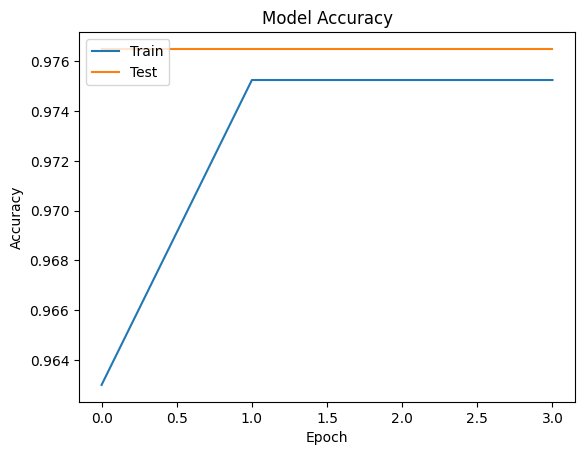

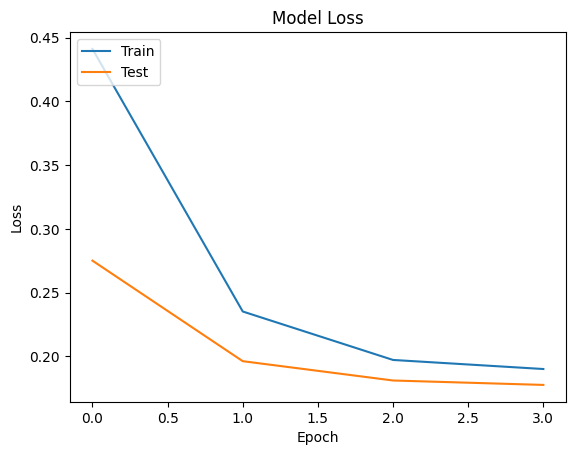

In [ ]:
# menampilkan grafik akurasi dan loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step
Confusion matrix:
 [[   0    0   42]
 [   0    0    5]
 [   0    0 1953]]


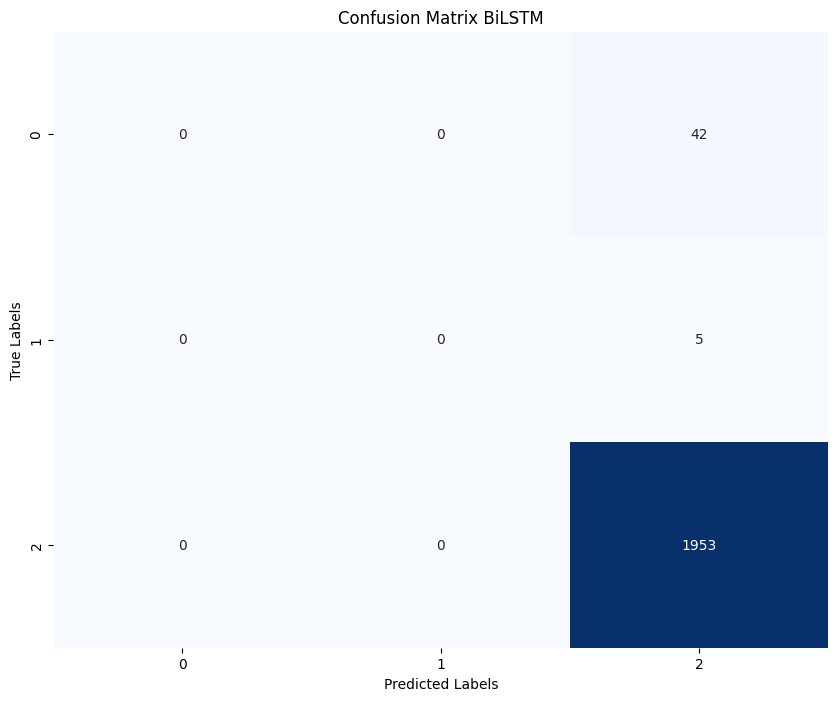

In [ ]:
# confusion matrix BiLSTM
model_pred_bilstm_prob = model_bilstm.predict(X_test)
model_pred_bilstm = (model_pred_bilstm_prob > 0.5).astype("int32")
matrik_bilstm = confusion_matrix(y_test, model_pred_bilstm)
print('Confusion matrix:\n', matrik_bilstm)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_bilstm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix BiLSTM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## DAFTAR KATA KATA SENTIMEN POSITIF

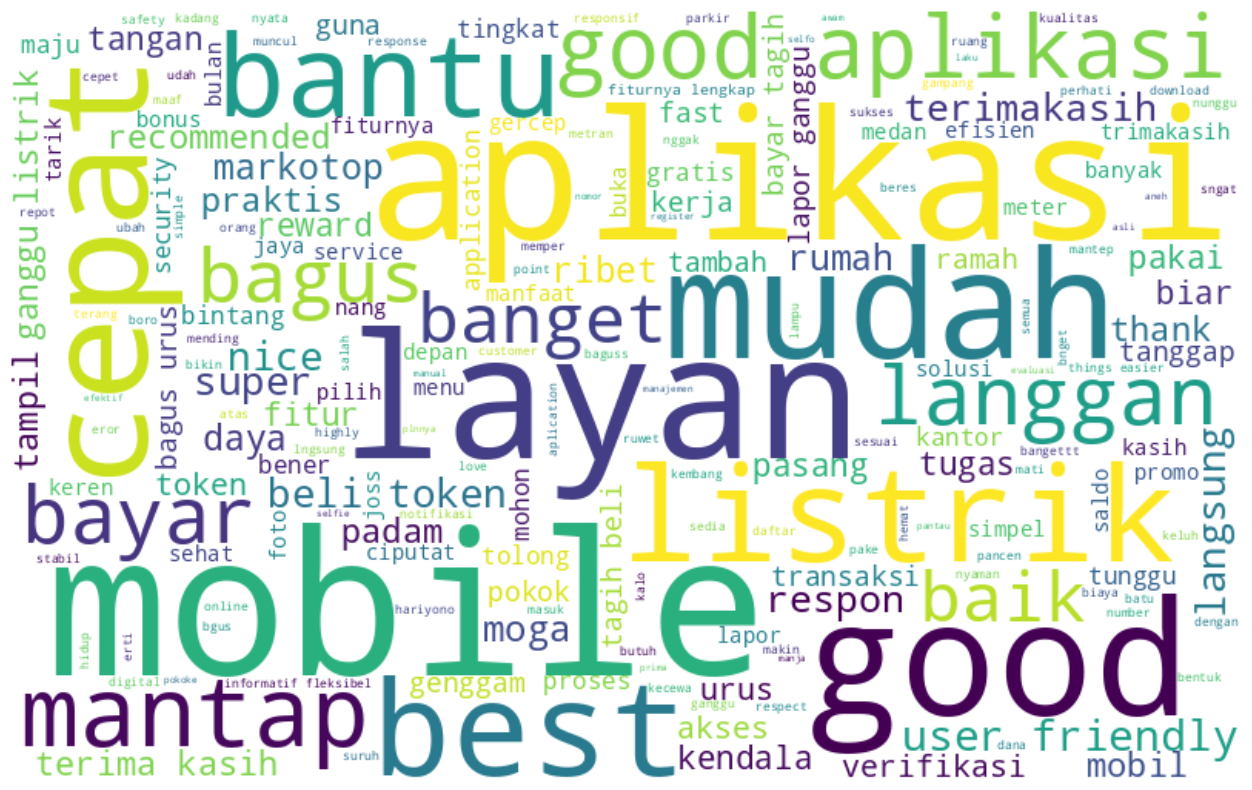

In [ ]:
df_p=reviews[reviews['sentiment']=='positif']
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## DAFTAR KATA KATA SENTIMEN NEUTRAL

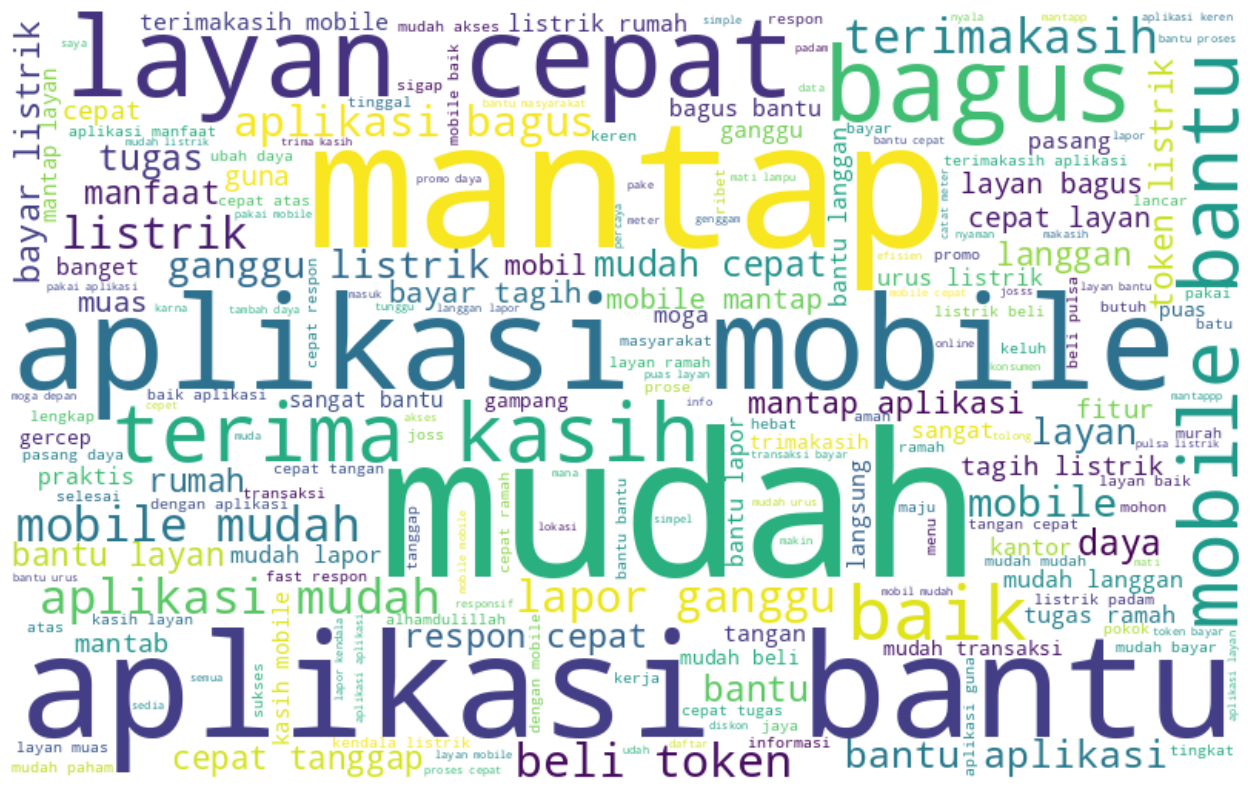

In [ ]:
Mdf_p=reviews[reviews['sentiment']=='netral']
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## DAFTAR KATA KATA SENTIMEN NEGATIF

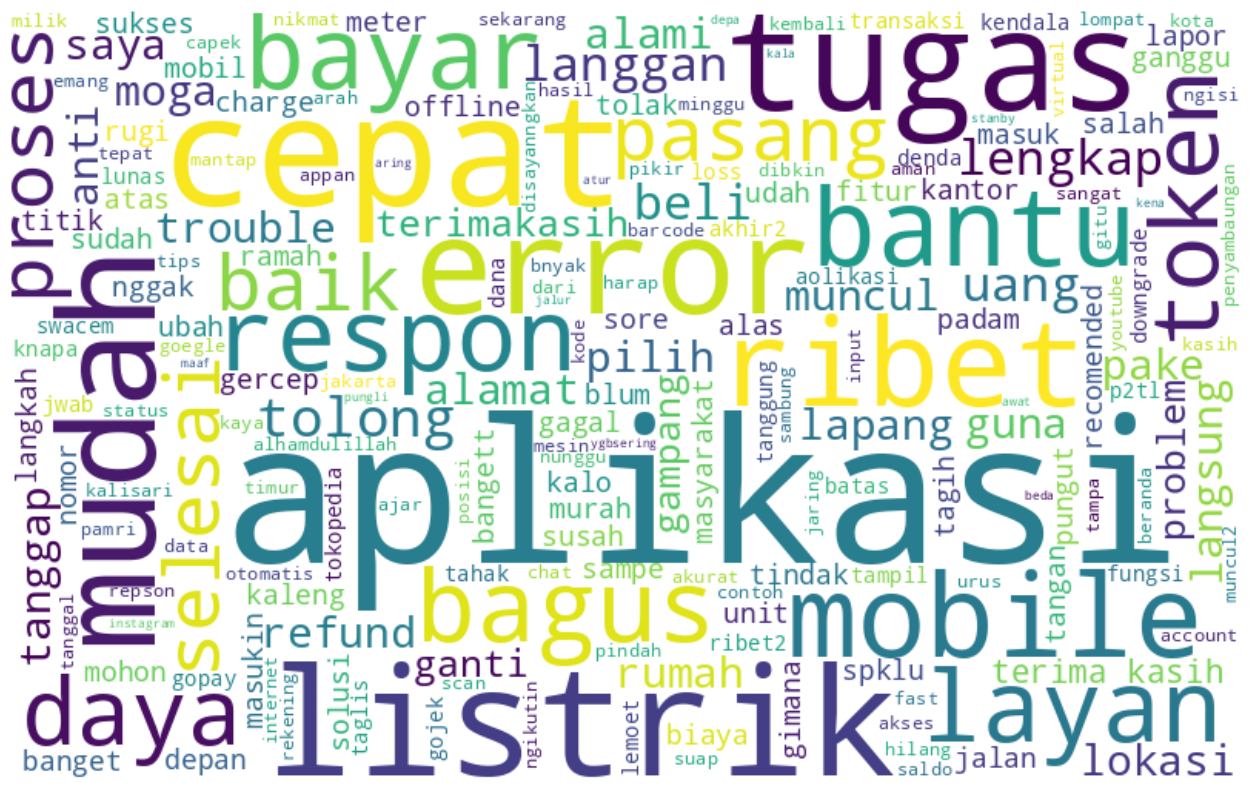

In [ ]:
df_p=reviews[reviews['sentiment']=='negatif']
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

#TF-IDF

Dipecah menjadi dua bagian TF (term frequency) dan IDF (inverse document frequency). T

In [ ]:
# Inisialisasi dan fit TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan fit_transform pada kolom text_string
tfidf_matrix = tfidf_vectorizer.fit_transform(tqdm(df['text_string'], desc="Menghitung TF-IDF"))

# Mengambil daftar fitur (kata-kata)
terms = tfidf_vectorizer.get_feature_names_out()

# Menghitung IDF
idf = np.log(tfidf_matrix.shape[0] / (np.count_nonzero(tfidf_matrix.toarray(), axis=0) + 1))

# Membuat DataFrame untuk menyimpan term dan IDF
tfidf_df = pd.DataFrame({'term': terms, 'idf': idf})

# Tambahkan kolom TF (term frequency) untuk setiap dokumen
for i, doc in enumerate(tqdm(df['text_string'], desc="Menambahkan kolom TF")):
    tf = tfidf_matrix[i].toarray().flatten()
    tfidf_df[f'tf_{i}'] = tf

Menambahkan kolom TF: 100%|██████████| 10000/10000 [00:28<00:00, 353.96it/s]


Sentiment Analysis Menggunakan Random Forest

In [ ]:
tfidf_df

term       idf  tf_0  tf_1  tf_2  tf_3  tf_4  tf_5  tf_6  tf_7  \
0           0pln  8.517193   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1     1000000000  8.517193   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2          10kwh  8.517193   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3           1300  7.824046   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         1300va  8.111728   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...          ...       ...   ...   ...   ...   ...   ...   ...   ...   ...   
3250     youtube  8.517193   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3251        yukk  8.517193   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3252        yukz  8.517193   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3253       zaman  7.600902   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3254        zuip  8.517193   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      ...  tf_9990  tf_9991  tf_9992  tf_9993  tf_9994  tf_9995  tf_9996  \
0     ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1     ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2     ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3     ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4     ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
3250  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3251  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3252  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3253  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3254  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      tf_9997  tf_9998  tf_9999  
0         0.0      0.0      0.0  
1         0.0      0.0      0.0  
2         0.0      0.0      0.0  
3         0.0      0.0      0.0  
4         0.0      0.0      0.0  
...       ...      ...      ...  
3250      0.0      0.0      0.0  
3251      0.0      0.0      0.0  
3252      0.0      0.0      0.0  
3253      0.0      0.0      0.0  
3254      0.0      0.0      0.0  

[3255 rows x 10002 columns]

In [ ]:
from joblib import dump

# Simpan objek TfidfVectorizer
dump(tfidf_vectorizer, 'tfidf_vectorizerPLN_Mobile.joblib')

['tfidf_vectorizerPLN_Mobile.joblib']

In [ ]:
# Mengakses vocabulary
vocab = tfidf_vectorizer.vocabulary_

# Menampilkan vocabulary
print(vocab)

{'respon': 2454, 'ulas': 3159, 'bintang': 418, 'bayar': 316, 'mobile': 1830, 'solusi': 2754, 'canggih': 518, 'butuh': 501, 'listrik': 1490, 'tagih': 2855, 'lapor': 1428, 'ganggu': 869, 'aplikasi': 163, 'bantu': 279, 'bagus': 241, 'ramah': 2386, 'mudah': 1869, 'quick': 2378, 'tangan': 2882, 'layan': 1439, 'cepat': 541, 'guna': 945, 'mantap': 1625, 'sangat': 2541, 'muas': 1866, 'gimana': 913, 'eror': 794, 'nyantol': 2005, 'henti': 988, 'masuk': 1670, 'praktis': 2317, 'fitur': 823, 'notifikasi': 1980, 'moga': 1843, 'tingkat': 3042, 'akses': 70, 'informasi': 1040, 'terima': 2979, 'kasih': 1212, 'tanggap': 2890, 'bingung': 417, 'dengan': 653, 'efektif': 776, 'bebrapa': 325, 'beli': 335, 'token': 3059, 'laku': 1400, 'daya': 633, 'terang': 2963, 'ekstra': 781, 'diskon': 720, 'kemaren': 1248, 'alhamdulillah': 91, 'promo': 2341, 'jaya': 1105, 'terimakasih': 2986, 'mantaaap': 1607, 'banget': 265, 'mantao': 1624, 'manfaat': 1595, 'tolong': 3068, 'mindahin': 1788, 'kabel': 1160, 'genteng': 899, 'r

SMOTE to Handling Imbalanced

In [ ]:
 #Menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi numerik
tfidf_vectorizer = TfidfVectorizer()

# Fill NaN values with an empty string
X = X.fillna('')

X_tfidf = tfidf_vectorizer.fit_transform(X)

# Inisialisasi SMOTE
smote = SMOTE()

# Resampling dataset untuk menangani imbalanced data
X_sm, y_sm = smote.fit_resample(X_tfidf, y)

Split Dataset

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=40)

Sentiment Analysis Menggunakan Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

algorithm = RandomForestClassifier()
model = algorithm.fit(X_train, y_train)

In [ ]:
from joblib import dump # Digunakan untuk menyimpan model yang telah dilatih

# Simpan model hasil traning
dump(model, filename='model_rfPLN_Mobile.joblib')

['model_rfPLN_Mobile.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy_rf = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy_rf, '%')

Jumlah prediksi benar	: 5783
Jumlah prediksi salah	: 70
Akurasi pengujian	: 98.8040321202802 %


In [ ]:
matrik = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', matrik)

Confusion matrix:
 [[1965    3   10]
 [   4 1956    3]
 [  23   27 1862]]


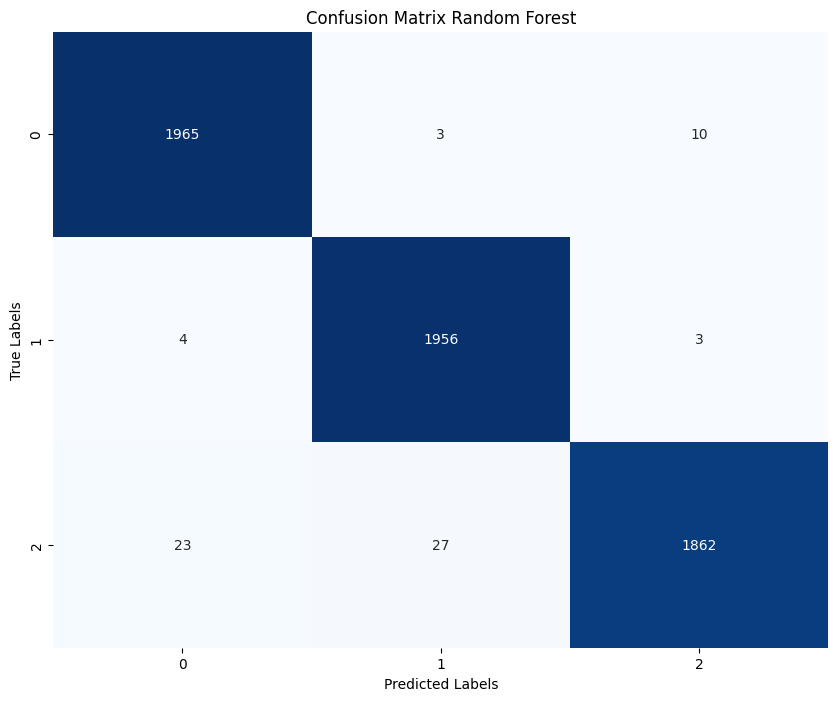

In [ ]:
# Misalkan y_test adalah label sebenarnya dan model_pred adalah prediksi model
matrik = confusion_matrix(y_test, model_pred)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Sentiment Analysis Menggunakan SVM

In [ ]:
# menggunakan SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Inisialisasi model
model_svm = SVC()

# Latih model
model_svm.fit(X_train, y_train)

# Simpan model
dump(model_svm, filename='model_svmPLN.joblib')


['model_svmPLN.joblib']

In [ ]:
_# Gunakan model yang telah di latih untuk memprediksi label pada data uji

model_pred_svm = model_svm.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred_svm

array([ 0, -1,  1, ...,  0,  1, -1])

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_svm = (model_pred_svm == y_test).sum()
prediksi_salah_svm = (model_pred_svm != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_svm)
print('Jumlah prediksi salah\t:', prediksi_salah_svm)

accuracy_svm = prediksi_benar_svm / (prediksi_benar_svm + prediksi_salah_svm)*100
print('Akurasi pengujian\t:', accuracy_svm, '%')

Jumlah prediksi benar	: 5643
Jumlah prediksi salah	: 210
Akurasi pengujian	: 96.4120963608406 %


Confusion matrix:
 [[1964   10    4]
 [  67 1880   16]
 [  95   18 1799]]


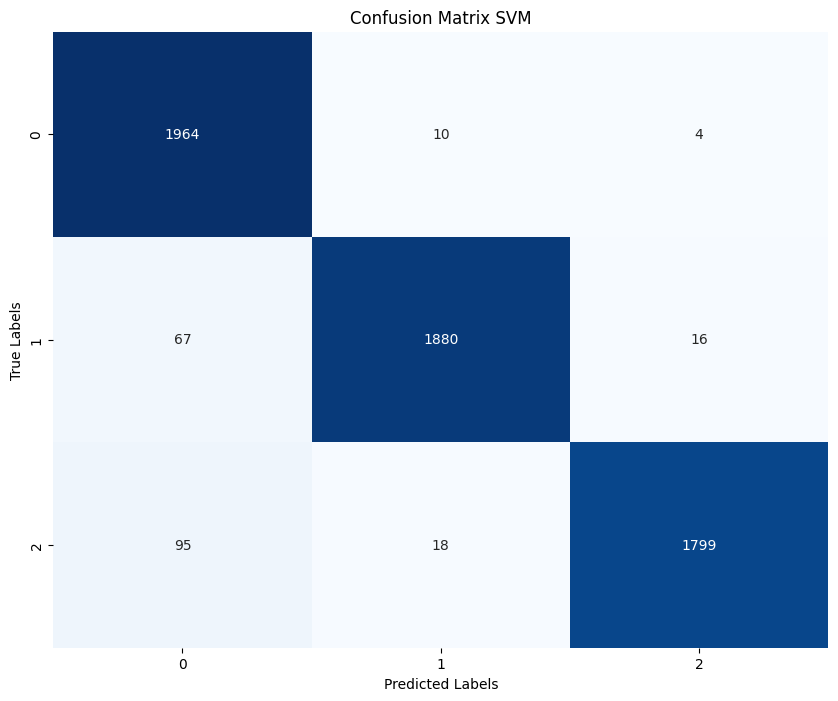

Classification report:
               precision    recall  f1-score   support

          -1       0.92      0.99      0.96      1978
           0       0.99      0.96      0.97      1963
           1       0.99      0.94      0.96      1912

    accuracy                           0.96      5853
   macro avg       0.97      0.96      0.96      5853
weighted avg       0.97      0.96      0.96      5853



In [ ]:
# confusion matrix SVM
matrik_svm = confusion_matrix(y_test, model_pred_svm)
print('Confusion matrix:\n', matrik_svm)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Classification report:\n', classification_report(y_test, model_pred_svm))


Sentiment Analysis Menggunakan Naive Baiyes



In [ ]:
# menggunakan NAIVE BAYES
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model
model_NB = MultinomialNB()

# Latih model
model_NB.fit(X_train, y_train)

# Simpan model
dump(model_NB, filename='model_NBPLN_Mobile.joblib')

['model_NBPLN_Mobile.joblib']

In [ ]:
_# Gunakan model yang telah di latih untuk memprediksi label pada data uji

model_pred_NB = model_NB.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred_NB

array([ 0, -1,  1, ...,  0,  1,  0])

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_nb = (model_pred_NB == y_test).sum()
prediksi_salah_nb = (model_pred_NB != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_nb)
print('Jumlah prediksi salah\t:', prediksi_salah_nb)

accuracy_nb = prediksi_benar_nb / (prediksi_benar_nb + prediksi_salah_nb)*100
print('Akurasi pengujian\t:', accuracy_nb, '%')

Jumlah prediksi benar	: 5575
Jumlah prediksi salah	: 278
Akurasi pengujian	: 95.25029899196993 %


Confusion matrix:
 [[1915   44   19]
 [   0 1832  131]
 [  40   44 1828]]


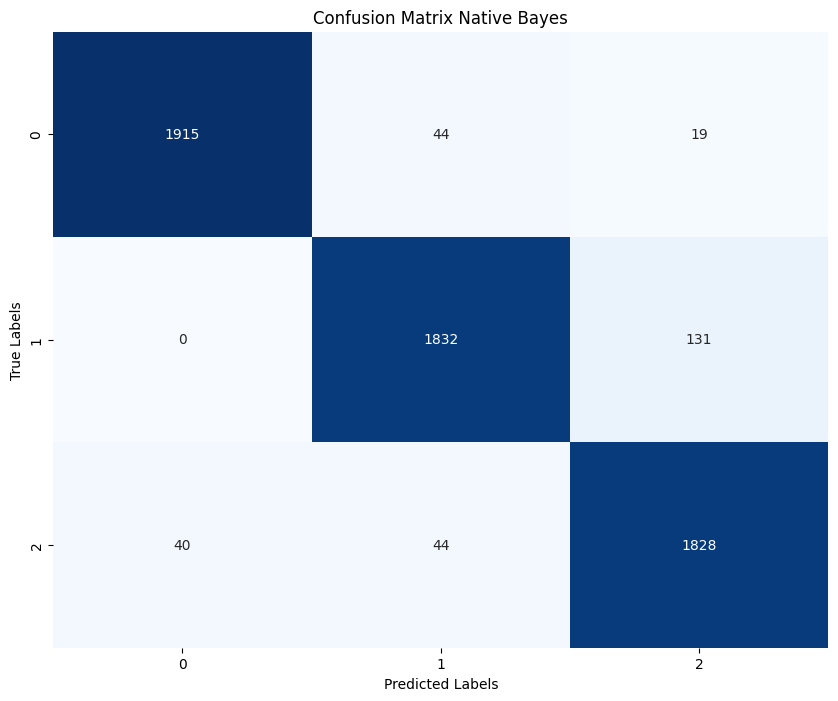

Classification report:
               precision    recall  f1-score   support

          -1       0.98      0.97      0.97      1978
           0       0.95      0.93      0.94      1963
           1       0.92      0.96      0.94      1912

    accuracy                           0.95      5853
   macro avg       0.95      0.95      0.95      5853
weighted avg       0.95      0.95      0.95      5853



In [ ]:
# confusion matrix Native Bayer
matrik_nb = confusion_matrix(y_test, model_pred_NB)
print('Confusion matrix:\n', matrik_nb)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Native Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Classification report:\n', classification_report(y_test, model_pred_NB))


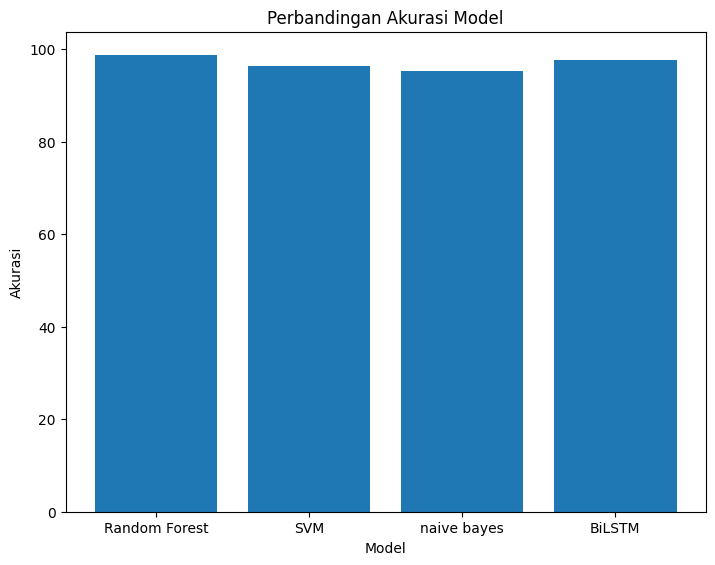

In [ ]:
# grafik perbandingan akurasi
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['Random Forest', 'SVM', 'naive bayes', 'BiLSTM']
accuracy = [accuracy_rf, accuracy_svm, accuracy_nb, accuracy_bilstm]
ax.bar(model, accuracy)
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()

In [ ]:
df_accuracy = pd.DataFrame({'Model': ['Random Forest', 'SVM', 'Native Bayes', 'BiLSTM'],
                             'Accuracy': [accuracy_rf, accuracy_svm, accuracy_nb, accuracy_bilstm]})
df_accuracy


Model   Accuracy
0  Random Forest  98.804032
1            SVM  96.412096
2   Native Bayes  95.250299
3         BiLSTM  97.649997

# Test Model
#### Testing yang menghasilkan output berupa kelas kategorikal (contoh: negatif, netral, dan positif).

In [ ]:
import pandas as pd
import re # modul re adalah regular expression

def preprocess_text(text):
    # Menghapus URL
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE)

    # Mengubah teks jadi lower case
    text = text.lower()

    # Menghapus mention
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE)

    # Menghapus hashtag
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE)

    # Menghapus next karakter
    text = re.sub(r"'\w+", ' ', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', ' ', text)

    # Menghapus extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Terapkan fungsi preprocess_text ke kolom 'content'
df['text_Clean'] = df['content'].progress_apply(preprocess_text)
df

100%|██████████| 10000/10000 [00:00<00:00, 88739.79it/s]


content  score  \
0                                 respon pengaduan lama      1   
1              itu yang ulasan bintang 5, bayaran semua      1   
2     PLN mobile adalah solusi canggih untuk kebutuh...      5   
3                                               PLN Ok,      5   
4                                                    ok      5   
...                                                 ...    ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...      1   
9996  Alhamdulillah sudah nyala sangat membantu teri...      5   
9997                 sangat membantu 🫶🙏 pelayanan cepat      5   
9998                         Terimakasih sudah nyala lg      5   
9999           tlfn pln malah disuruh cari teknisi lain      1   

                                          clean_content sentiment  label_num  \
0                                 respon pengaduan lama    netral         -1   
1              itu yang ulasan bintang 5, bayaran semua    netral         -1   
2     pln mobile adalah solusi canggih untuk kebutuh...    netral          1   
3                                               pln ok,   positif          1   
4                                                    ok   positif          1   
...                                                 ...       ...        ...   
9995  aplikasihnya tdk bisa d gunakan untuk daftar p...    netral         -1   
9996  alhamdulillah sudah nyala sangat membantu teri...    netral          1   
9997                 sangat membantu 🫶🙏 pelayanan cepat    netral          1   
9998                         terimakasih sudah nyala lg    netral          1   
9999           tlfn pln malah disuruh cari teknisi lain    netral         -1   

         label                                      content_token  \
0     negative                                [respon, pengaduan]   
1     negative                      [ulasan, bintang, 5, bayaran]   
2     positive  [PLN, mobile, solusi, canggih, kebutuhan, keli...   
3     positive                                          [PLN, Ok]   
4     positive                                               [ok]   
...        ...                                                ...   
9995  negative        [aplikasihnya, tdk, d, daftar, pasang, 900]   
9996  positive  [Alhamdulillah, nyala, membantu, terimakasih, ...   
9997  positive                       [membantu, pelayanan, cepat]   
9998  positive                           [Terimakasih, nyala, lg]   
9999  negative                [tlfn, pln, disuruh, cari, teknisi]   

                                                stemmed  \
0                                         [respon, adu]   
1                             [ulas, bintang, 5, bayar]   
2     [pln, mobile, solusi, canggih, butuh, listrik,...   
3                                             [pln, ok]   
4                                                  [ok]   
...                                                 ...   
9995        [aplikasihnya, tdk, d, daftar, pasang, 900]   
9996  [alhamdulillah, nyala, bantu, terimakasih, tug...   
9997                              [bantu, layan, cepat]   
9998                           [terimakasih, nyala, lg]   
9999                  [tlfn, pln, suruh, cari, teknisi]   

                                            text_string  \
0                                                respon   
1                                    ulas bintang bayar   
2     mobile solusi canggih butuh listrik tagih lapo...   
3                                                         
4                                                         
...                                                 ...   
9995                         aplikasihnya daftar pasang   
9996  alhamdulillah nyala bantu terimakasih tugas mo...   
9997                                  bantu layan cepat   
9998                                  terimakasih nyala   
9999                            tlfn suruh cari teknisi   

                                             te

In [ ]:
from joblib import load
from sklearn.feature_extraction.text import TfidfVectorizer

# Muat model yang telah disimpan
model = load('model_rfPLN_Mobile.joblib')

# Muat TF-IDF Vectorizer yang telah disimpan
vectorizer = load('tfidf_vectorizerPLN_Mobile.joblib')

# Tetapkan input teks secara manual
test_input = "PLN sangat membantu saya dalam melakukan check transaksi Listrik"

# Preprocess text
test_input_preprocessed = preprocess_text(test_input)

# Tampilkan hasil preprocessing
print(f'Teks setelah preprocessing: {test_input_preprocessed}')

# Transformasi input teks yang telah dipreprocessing menjadi fitur
test_input_transformed = vectorizer.transform([test_input_preprocessed])

# Buat prediksi
prediksi = model.predict(test_input_transformed)

# Ambil hasil prediksi
hasil_prediksi = prediksi[0]

# Map hasil prediksi ke label sentimen menggunakan if-else
if hasil_prediksi == -1:
    sentimen = 'Negatif'
elif hasil_prediksi == 0:
    sentimen = 'Netral'
elif hasil_prediksi == 1:
    sentimen = 'Positif'
else:
    sentimen = 'Label tidak dikenali'

# Cetak hasil sentimen
print(f'Hasil prediksi: {sentimen}')


Teks setelah preprocessing: pln sangat membantu saya dalam melakukan check transaksi listrik
Hasil prediksi: Positif


In [ ]:
# Simpan hasil ke file
with open('hasil_prediksiSentimenPLN_MObile.txt', 'w') as file:
    file.write(f'Teks asli: {test_input}\n')
    file.write(f'Teks setelah preprocessing: {test_input_preprocessed}\n')
    file.write(f'Hasil sentimen: {sentimen}\n')

## DAFTAR KATA KATA SENTIMEN POSITIF BY LABEL

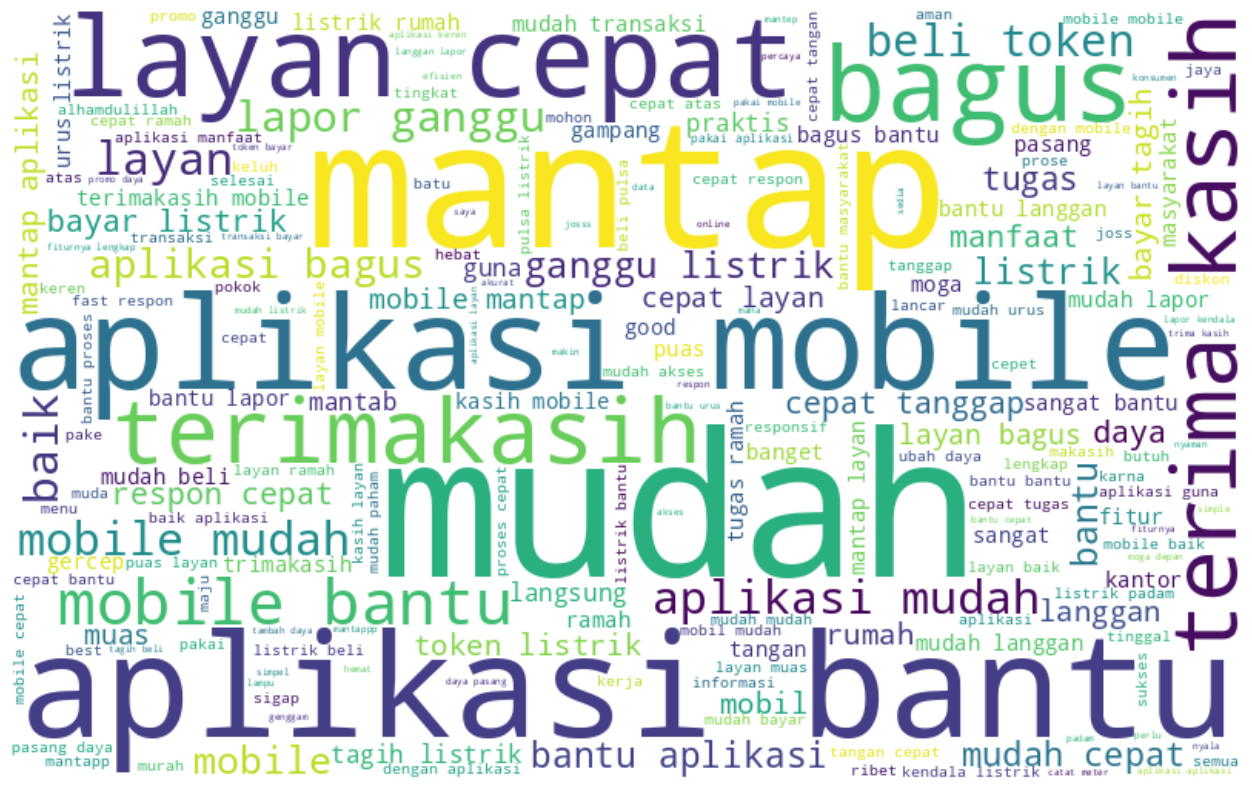

In [ ]:
df_p=df[df['label_num']==1]

all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## DAFTAR KATA KATA SENTIMEN NEUTRAL BY LABEL

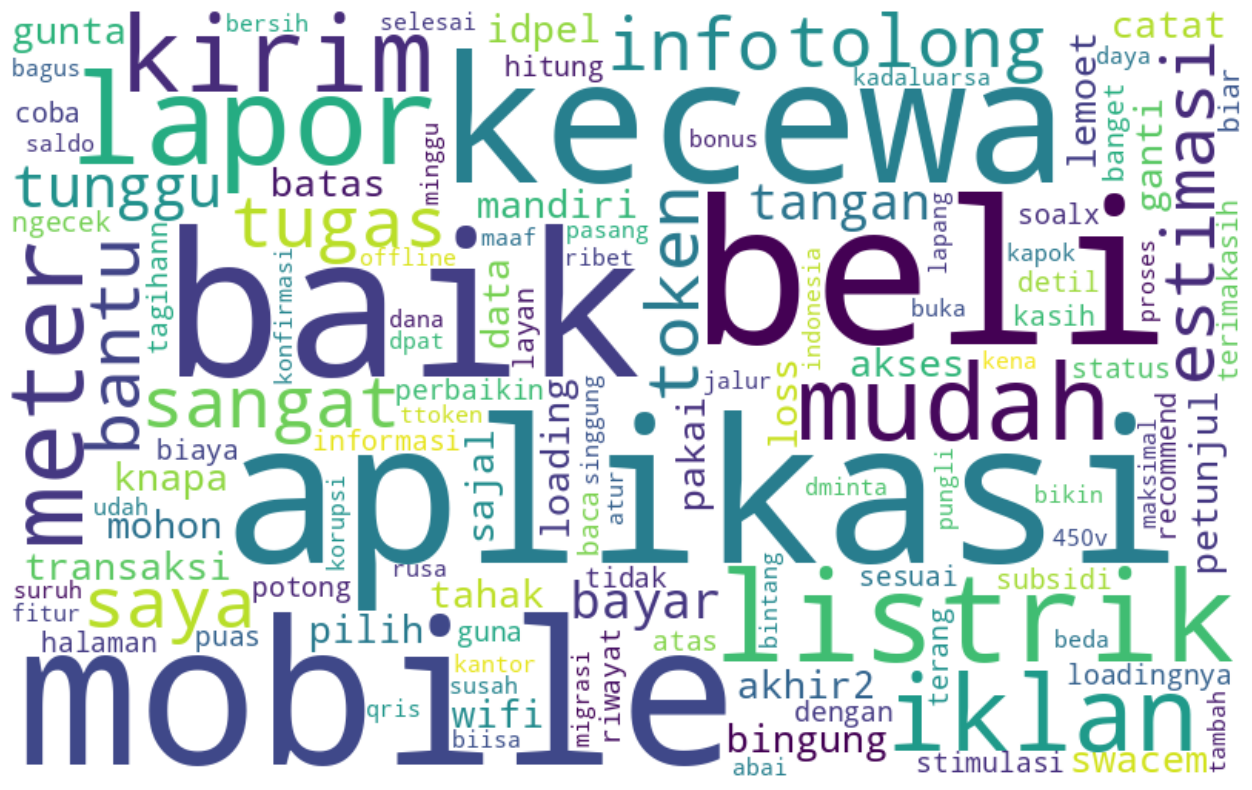

In [ ]:
df_n=df[df['label_num']==0]

all_words_lem = ' '.join([word for word in df_n['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## DAFTAR KATA KATA SENTIMEN NEGATIF BY LABEL

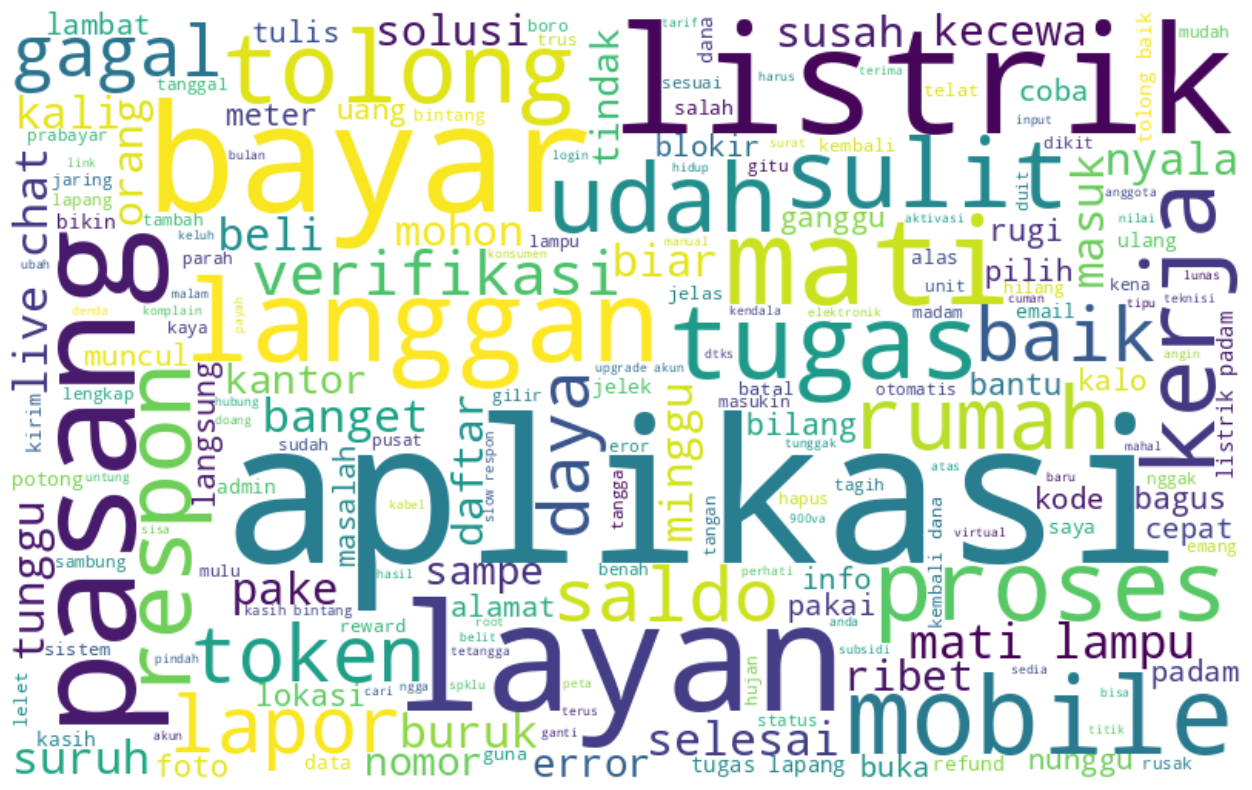

In [ ]:
df_n = df[df['label_num'] == -1]
all_words_lem = ' '.join([word for word in df_n['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

##Kata kata yang Banyak Muncul

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
fd.most_common(3)

[('aplikasi', 74), ('listrik', 43), ('bayar', 37)]

In [ ]:
fd.tabulate(3)

aplikasi  listrik    bayar 
      74       43       37 


In [ ]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

<Axes: title={'center': '10 kata paling sering muncul'}, ylabel='None'>

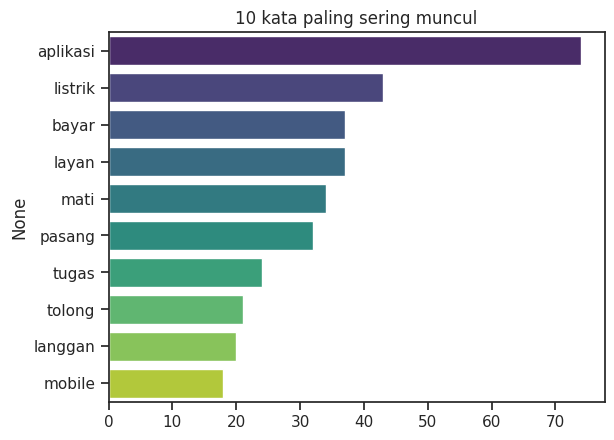

In [ ]:
sns.set_theme(style="ticks")

# title
plt.title('10 kata paling sering muncul')

# Create barplot
sns.barplot(y=fdist.index, x=fdist.values, palette='viridis')